# Kroki przetwarzania obrazu

In [61]:
from pylab import *
from skimage import img_as_float, exposure
from skimage.color import rgb2gray
from skimage.morphology import disk, erosion, dilation
from skimage.filters import median, frangi, meijering, threshold_otsu, rank

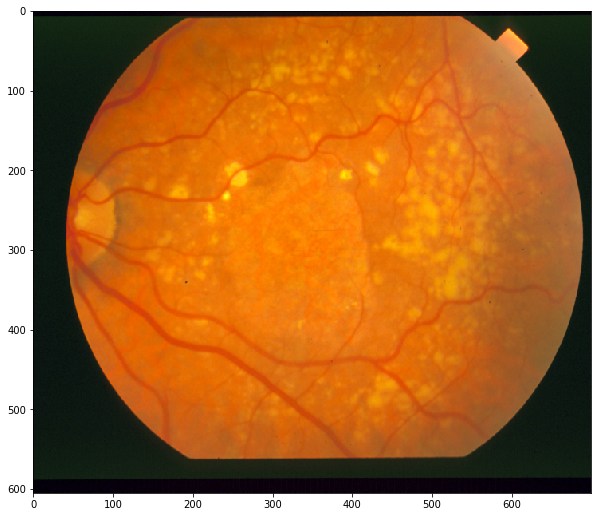

In [3]:
image = img_as_float(plt.imread("pictures/im0003.ppm"))

plt.figure(figsize=(10, 10))
plt.imshow(image)

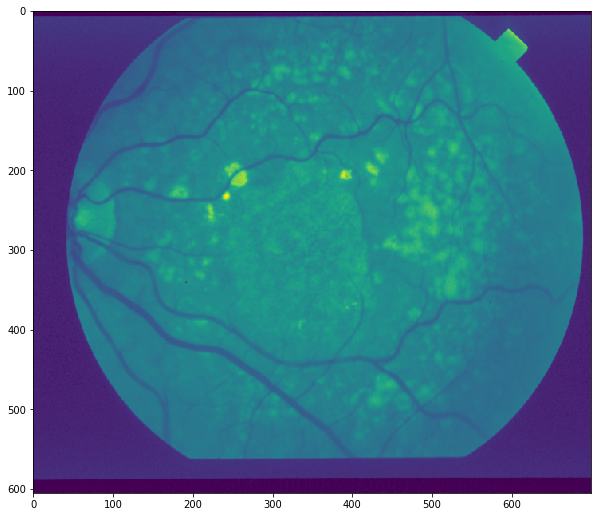

In [4]:
green_image = image[:,:,1]

plt.figure(figsize=(10,10))
plt.imshow(green_image)

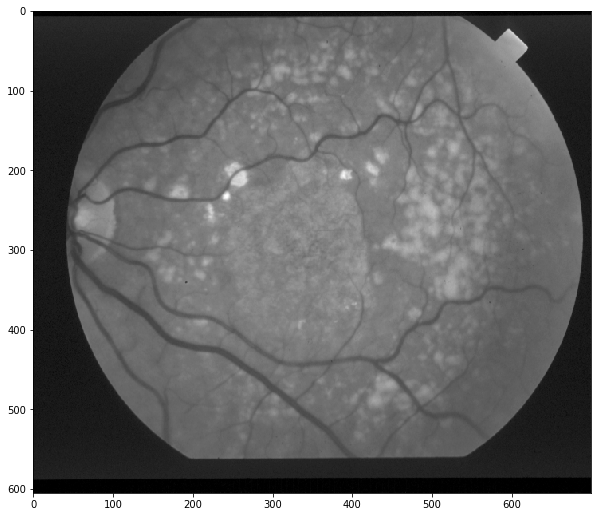

In [5]:
gray_image = rgb2gray(green_image)

plt.figure(figsize=(10,10))
plt.imshow(gray_image, cmap=plt.cm.gray)

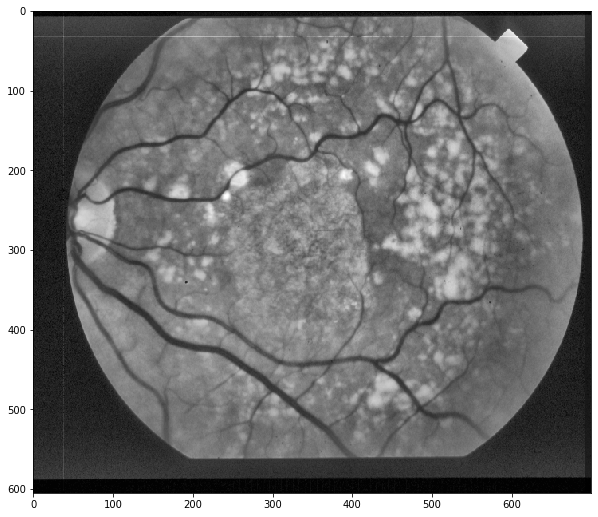

In [6]:
contrast_gray_image = exposure.equalize_adapthist(gray_image)

plt.figure(figsize=(10,10))
plt.imshow(contrast_gray_image, cmap=plt.cm.gray)

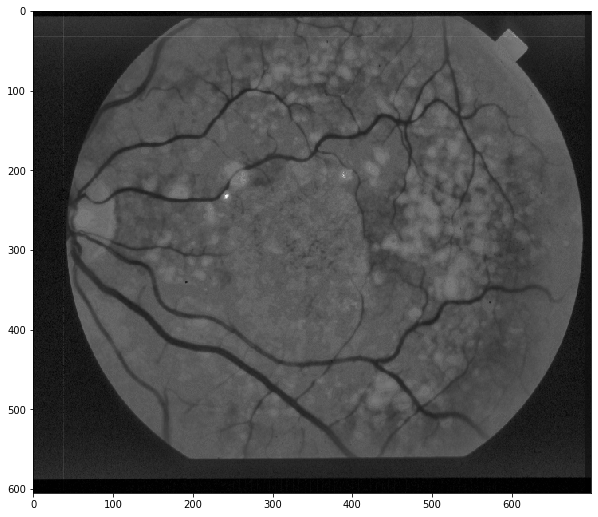

In [7]:
dark_green_image = contrast_gray_image
dark_green_image[dark_green_image > 1] = 1
dark_green_image[dark_green_image > 0.95] += (dark_green_image[dark_green_image > 0.95] - 1)
dark_green_image[dark_green_image > 0.9] += (dark_green_image[dark_green_image > 0.9] - 0.95)
dark_green_image[dark_green_image > 0.85] += (dark_green_image[dark_green_image > 0.85] - 0.9)
dark_green_image[dark_green_image > 0.8] += (dark_green_image[dark_green_image > 0.8] - 0.85)


dark_green_image[dark_green_image > 0.8] -= 0.05
dark_green_image[dark_green_image > 0.7] -= 0.05
dark_green_image[dark_green_image > 0.6] -= 0.05
dark_green_image[dark_green_image > 0.5] -= 0.05

MIN = 0 / 256
MAX = 500 / 256
norm = (dark_green_image - MIN) / (MAX - MIN)
norm[norm > 0.6] = 1.0
norm[norm < 0] = 0

plt.figure(figsize=(10,10))
plt.imshow(dark_green_image, cmap=plt.cm.gray)

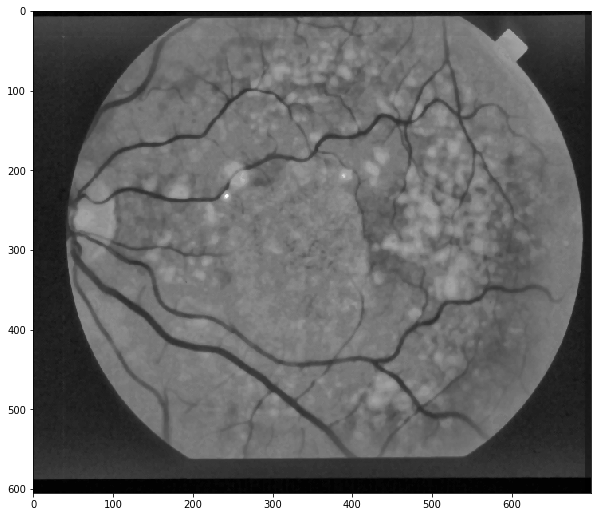

In [8]:
median_dark = median(dark_green_image, disk(2))
median_dark[median_dark > 1] = 1
median_dark[median_dark < 0] = 0

plt.figure(figsize=(10,10))
plt.imshow(median_dark, cmap=plt.cm.gray)

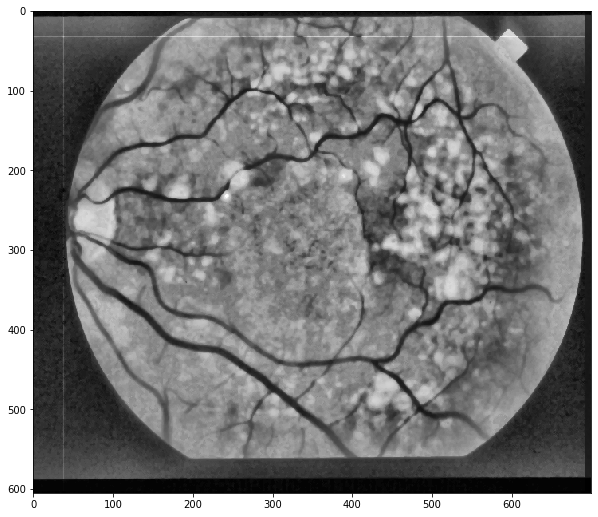

In [9]:
contrast_median_dark = exposure.equalize_adapthist(median_dark)

plt.figure(figsize=(10,10))
plt.imshow(contrast_median_dark, cmap=plt.cm.gray)

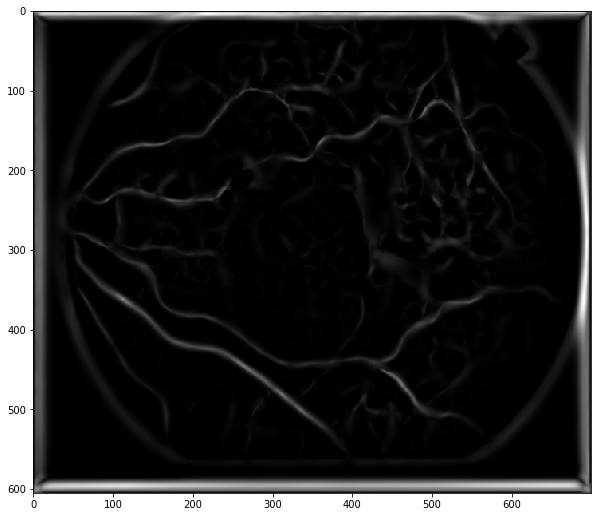

In [10]:
frangi_image = frangi(contrast_median_dark)

plt.figure(figsize=(10,10))
plt.imshow(frangi_image, cmap=plt.cm.gray)

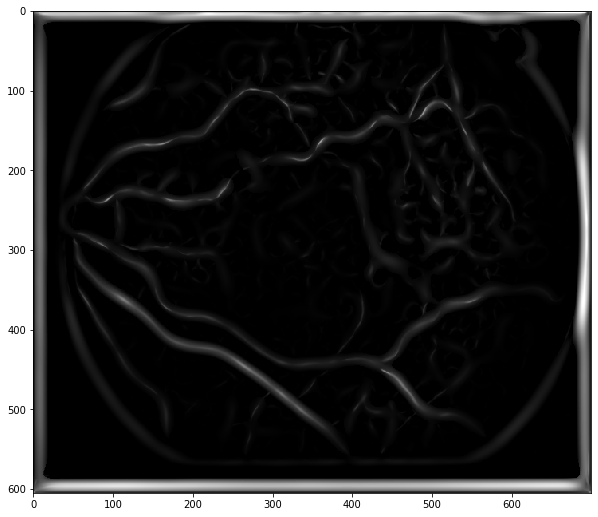

In [12]:
meijering_image = meijering(frangi_image, black_ridges=False)

plt.figure(figsize=(10,10))
plt.imshow(meijering_image, cmap=plt.cm.gray)

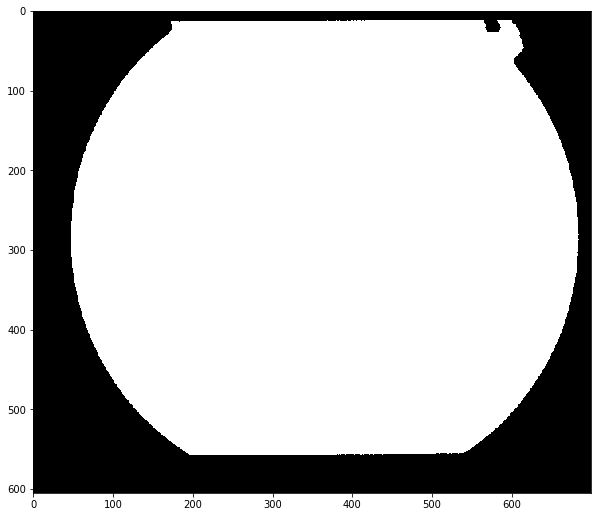

In [14]:
mask = gray_image.copy()
mask[mask > 0.15] = 1
mask[mask <= 0.15] = 0
mask = erosion(mask, disk(6))

plt.figure(figsize=(10,10))
plt.imshow(mask, cmap=plt.cm.gray)

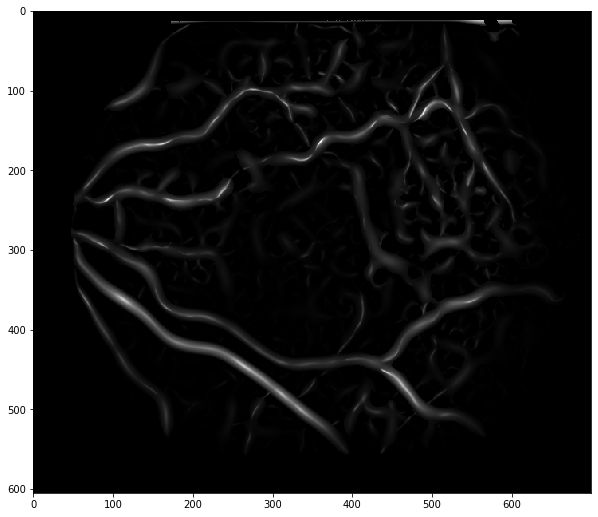

In [86]:
no_frame_meijering = meijering_image
no_frame_meijering[mask == 0] = 0

plt.figure(figsize=(10,10))
plt.imshow(no_frame_meijering, cmap=plt.cm.gray)

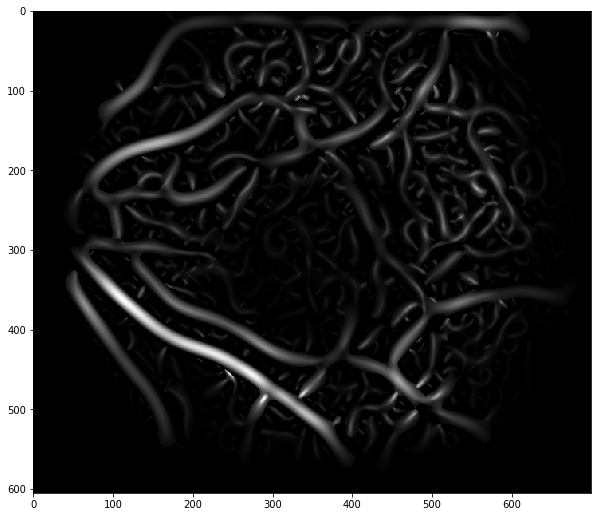

In [91]:
a = meijering(no_frame_meijering, black_ridges=False)

for i in range(10):
    a = meijering(a, black_ridges=False)

plt.figure(figsize=(10,10))
plt.imshow(a, cmap=plt.cm.gray)

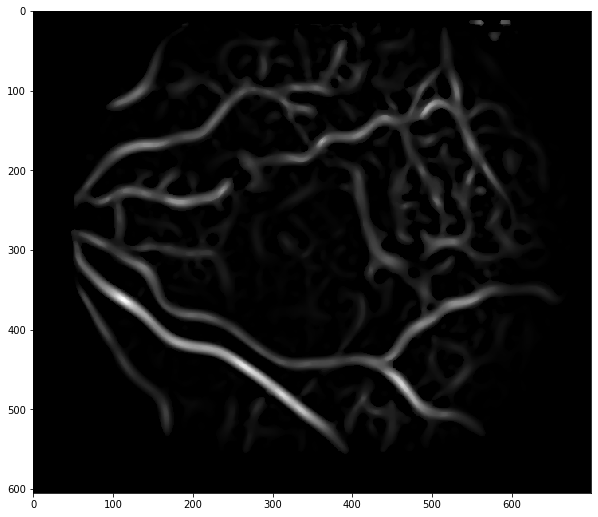

In [58]:
median_meijering = median(no_frame_meijering, disk(5))

plt.figure(figsize=(10,10))
plt.imshow(median_meijering, cmap=plt.cm.gray)

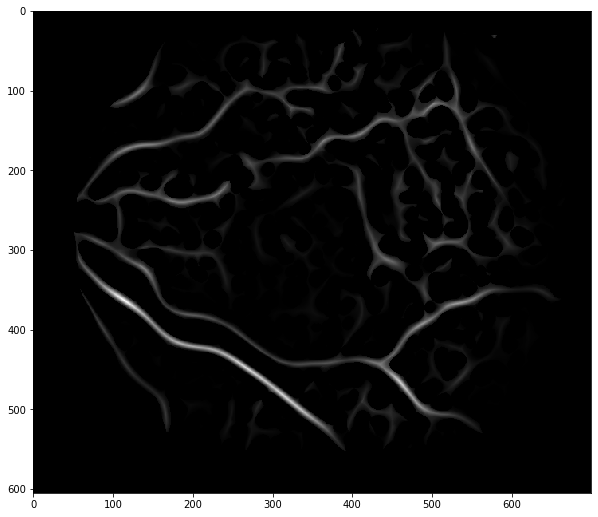

In [59]:
abc = median_meijering
abc = erosion(median_meijering, disk(4))
# abc = dilation(median_meijering, disk(1))

plt.figure(figsize=(10,10))
plt.imshow(abc, cmap=plt.cm.gray)